In [1]:
import pandas as pd
import numpy as np


/var/folders/dd/8bs90_x11fxby7j1952zh8m00000gn/T/ipykernel_93040/2937650959.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Conclusions from data set.

This is the compilation of each segment conlcusions for the Employee Prodcutivity and Well-Being Survey for the Final Project. Please refer to each section to get more context.

- Cleaning the Dataset
The column names where changed to make it easier on the script, the missing values where filled using a backwards value mehtod instead of the most common to prevent the alteration of the distribution of the answers. This was specially to the case of a question that was sensitive to this, The before and after shows that the inclination towards one answer 3 (Nuetral) increased by 3%. 

- Data Analysisç
The Majority of the Q1-Q2 cT

        The main focus on Full time Employees will be: 
        * Finance                  7
        * Manufacturing            5
        * Marketing               10
        * Technology               6


##### Import the Dataset


In [2]:
df = pd.read_csv('/Users/danielnavia/Desktop/Employee Productivity and Well-being Survey.csv')
df
df_original = df

#Make a copy
df_copy = df_original.copy()


In [3]:
df_copy

,Marca temporal,Role,Industry/Field of work,Years of Work Experience:,How would you describe your work environment?,How would you rate your current work-life balance?,"On a scale of 1 to 5, how satisfied are/were you with your work environment?",Do you think your work environment has a negative impact in your productivity?,What factors do you think that limits your productivity (Select all that apply),How satisfied are you with the technology and tools provided to perform your job?,How do you prioritize your tasks to ensure optimal productivity?,What type of professional development opportunities would you like to see offered? (Select all that apply),How satisfied are you with the opportunities for professional development provided by your employer?
0,2024/02/01 5:29:29 p.m. GMT+1,Student with Work Experience,Finance,Less than 1 year,Open office,Good,3 (Neutral),No,Long working hours;Lack of training provided b...,Satisfied,Prioritize based on deadlines,Training workshops,Satisfied
1,2024/02/01 5:32:44 p.m. GMT+1,Student with Work Experience,Engineering,Less than 1 year,Private office,Good,3 (Neutral),No,Technology provided by the company is not upda...,Neutral,Follow a set schedule,Training workshops;Skill-building programs,Neutral
2,2024/02/01 5:34:54 p.m. GMT+1,Student with Work Experience,Technology,Less than 1 year,Remote/Telecommuting,Fair,3 (Neutral),Yes,Long working hours;Technology provided by the ...,Satisfied,Prioritize based on deadlines,Training workshops;Skill-building programs;Edu...,Neutral
3,2024/02/01 5:34:58 p.m. GMT+1,Student with Work Experience,Finance,Less than 1 year,Private office,Good,3 (Neutral),Yes,High workload;Lack of physical tools provided ...,Neutral,Prioritize based on deadlines,Training workshops;Skill-building programs;Men...,Dissatisfied
4,2024/02/01 5:38:30 p.m. GMT+1,Student with Work Experience,Marketing,Less than 1 year,Private office,Fair,3 (Neutral),Yes,Long working hours;High workload,Satisfied,Prioritize based on deadlines,Training workshops;Skill-building programs,Dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2024/02/02 3:15:34 p.m. GMT+1,Full-Time Employee,Technology,4-6 years,Open office,Fair,3 (Neutral),Yes,Technology provided by the company is not updated,Unsatisfied,Prioritize based on importance,Training workshops,Neutral
58,2024/02/02 3:24:45 p.m. GMT+1,Full-Time Employee,Technology,More than 10 years,Private office,Good,3 (Neutral),Yes,Long working hours;Technology provided by the ...,Neutral,Follow a set schedule,Skill-building programs,Neutral
59,2024/02/02 3:24:55 p.m. GMT+1,Full-Time Employee,Marketing,4-6 years,Open office,Good,2 (Slightly satisfied),Yes,Technology provided by the company is not upda...,Unsatisfied,Prioritize based on importance,Training workshops;Educational reimbursements,Neutral
60,2024/02/02 3:43:30 p.m. GMT+1,Full-Time Employee,Technology,1-3 years,Remote/Telecommuting,Very good,4 (Satisfied),Yes,High workload;Other (please specify);Commoditi...,Satisfied,Prioritize based on deadlines,Mentorship programs,Very satisfied


#### Start Cleaning on df_copy

In [4]:
df_copy.rename(columns = {'Marca temporal':'Timestamp'}, inplace = True)

In [5]:
# Derive column 'Date' from column: 'Timestamp'
# Transform based on the following examples:
#    Timestamp                          Output
# 1: "2024/02/01 5:29:29 p.m. GMT+1" => "2024/02/01"
df_copy.insert(1, "Date", df_copy["Timestamp"].str.split(" ").str[0])
# Replace gaps back from the next valid value in: 'Role', 'Industry/Field of work' and 10 other columns
df_copy = df_copy.fillna({'Role': df_copy['Role'].bfill(), 'Industry/Field of work': df_copy['Industry/Field of work'].bfill(),
                           'Years of Work Experience:': df_copy['Years of Work Experience:'].bfill(), 
                           'How would you describe your work environment?': 
                           df_copy['How would you describe your work environment?'].bfill(), 
                           'How would you rate your current work-life balance?': 
                           df_copy['How would you rate your current work-life balance?'].bfill(), 
                           'On a scale of 1 to 5, how satisfied are/were you with your work environment?':
                             df_copy['On a scale of 1 to 5, how satisfied are/were you with your work environment?'].bfill(),
                              'Do you think your work environment has a negative impact in your productivity?': 
                              df_copy['Do you think your work environment has a negative impact in your productivity?'].bfill(),
                                'What factors do you think that limits your productivity (Select all that apply)': 
                                df_copy['What factors do you think that limits your productivity (Select all that apply)'].bfill(),
                                  'How satisfied are you with the technology and tools provided to perform your job? ':
                                    df_copy['How satisfied are you with the technology and tools provided to perform your job? '].bfill(), 
                                    'How do you prioritize your tasks to ensure optimal productivity?': 
                                    df_copy['How do you prioritize your tasks to ensure optimal productivity?'].bfill(), 
                                    'What type of professional development opportunities would you like to see offered? (Select all that apply)': 
                                    df_copy['What type of professional development opportunities would you like to see offered? (Select all that apply)'].bfill(),
                                      'How satisfied are you with the opportunities for professional development provided by your employer?': 
                                    df_copy['How satisfied are you with the opportunities for professional development provided by your employer?'].bfill()})
# Convert text to lowercase in column: 'What factors do you think that limits your productivity (Select all that apply)'
df_copy['What factors do you think that limits your productivity (Select all that apply)'] = df_copy['What factors do you think that limits your productivity (Select all that apply)'].str.lower()


In [6]:
def clean_data(df_copy):
    # Rename column 'Role' to 'Q1'
    df_copy = df_copy.rename(columns={'Role': 'Q1'})
    # Rename column 'Industry/Field of work' to 'Q2'
    df_copy = df_copy.rename(columns={'Industry/Field of work': 'Q2'})
    # Rename column 'Years of Work Experience:' to 'Q3'
    df_copy = df_copy.rename(columns={'Years of Work Experience:': 'Q3'})
    # Rename column 'How would you describe your work environment?' to 'Q4'
    df_copy = df_copy.rename(columns={'How would you describe your work environment?': 'Q4'})
    # Rename column 'How would you rate your current work-life balance?' to 'Q5'
    df_copy = df_copy.rename(columns={'How would you rate your current work-life balance?': 'Q5'})
    # Rename column 'On a scale of 1 to 5, how satisfied are/were you with your work environment?' to 'Q6'
    df_copy = df_copy.rename(columns={'On a scale of 1 to 5, how satisfied are/were you with your work environment?': 'Q6'})
    # Rename column 'Do you think your work environment has a negative impact in your productivity?' to 'Q7'
    df_copy = df_copy.rename(columns={'Do you think your work environment has a negative impact in your productivity?': 'Q7'})
    # Rename column 'What factors do you think that limits your productivity (Select all that apply)' to 'Q8'
    df_copy = df_copy.rename(columns={'What factors do you think that limits your productivity (Select all that apply)': 'Q8'})
    # Rename column 'How satisfied are you with the technology and tools provided to perform your job? ' to 'Q9'
    df_copy = df_copy.rename(columns={'How satisfied are you with the technology and tools provided to perform your job? ': 'Q9'})
    # Rename column 'How do you prioritize your tasks to ensure optimal productivity?' to 'Q10'
    df_copy = df_copy.rename(columns={'How do you prioritize your tasks to ensure optimal productivity?': 'Q10'})
    # Rename column 'What type of professional development opportunities would you like to see offered? (Select all that apply)' to 'Q11'
    df_copy = df_copy.rename(columns={'What type of professional development opportunities would you like to see offered? (Select all that apply)': 'Q11'})
    # Rename column 'How satisfied are you with the opportunities for professional development provided by your employer?' to 'Q12'
    df_copy = df_copy.rename(columns={'How satisfied are you with the opportunities for professional development provided by your employer?': 'Q12'})
    return df_copy

df_copy_clean = clean_data(df_copy.copy())
df_copy_clean.head()

,Timestamp,Date,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,2024/02/01 5:29:29 p.m. GMT+1,2024/02/01,Student with Work Experience,Finance,Less than 1 year,Open office,Good,3 (Neutral),No,long working hours;lack of training provided b...,Satisfied,Prioritize based on deadlines,Training workshops,Satisfied
1,2024/02/01 5:32:44 p.m. GMT+1,2024/02/01,Student with Work Experience,Engineering,Less than 1 year,Private office,Good,3 (Neutral),No,technology provided by the company is not upda...,Neutral,Follow a set schedule,Training workshops;Skill-building programs,Neutral
2,2024/02/01 5:34:54 p.m. GMT+1,2024/02/01,Student with Work Experience,Technology,Less than 1 year,Remote/Telecommuting,Fair,3 (Neutral),Yes,long working hours;technology provided by the ...,Satisfied,Prioritize based on deadlines,Training workshops;Skill-building programs;Edu...,Neutral
3,2024/02/01 5:34:58 p.m. GMT+1,2024/02/01,Student with Work Experience,Finance,Less than 1 year,Private office,Good,3 (Neutral),Yes,high workload;lack of physical tools provided ...,Neutral,Prioritize based on deadlines,Training workshops;Skill-building programs;Men...,Dissatisfied
4,2024/02/01 5:38:30 p.m. GMT+1,2024/02/01,Student with Work Experience,Marketing,Less than 1 year,Private office,Fair,3 (Neutral),Yes,long working hours;high workload,Satisfied,Prioritize based on deadlines,Training workshops;Skill-building programs,Dissatisfied


In [16]:
import pandas as pd

def clean_data(df_copy_clean):
    # Split text using string ' ' in column: 'Q6'
    loc_0 = df_copy_clean.columns.get_loc('Q6')
    df_copy_clean_split = df_copy_clean['Q6'].str.split(expand=True).add_prefix('Q6_')
    df_copy_clean = pd.concat([df_copy_clean.iloc[:, :loc_0], df_copy_clean_split, df_copy_clean.iloc[:, loc_0:]], axis=1)
    df_copy_clean = df_copy_clean.drop(columns=['Q6'])
    return df_copy_clean

df_copy_clean_1 = clean_data(df_copy_clean.copy())
df_copy_clean_1.head()

drop_columns = ['Q6_2', 'Q6_3', 'Q6_4']
df_copy_clean_1 = df_copy_clean_1.drop(columns=drop_columns)
df_copy_clean_1.head()

,Timestamp,Date,Q1,Q2,Q3,Q4,Q5,Q6_0,Q6_1,Q7,Q8,Q9,Q10,Q11,Q12
0,2024/02/01 5:29:29 p.m. GMT+1,2024/02/01,Student with Work Experience,Finance,Less than 1 year,Open office,Good,3,(Neutral),No,long working hours;lack of training provided b...,Satisfied,Prioritize based on deadlines,Training workshops,Satisfied
1,2024/02/01 5:32:44 p.m. GMT+1,2024/02/01,Student with Work Experience,Engineering,Less than 1 year,Private office,Good,3,(Neutral),No,technology provided by the company is not upda...,Neutral,Follow a set schedule,Training workshops;Skill-building programs,Neutral
2,2024/02/01 5:34:54 p.m. GMT+1,2024/02/01,Student with Work Experience,Technology,Less than 1 year,Remote/Telecommuting,Fair,3,(Neutral),Yes,long working hours;technology provided by the ...,Satisfied,Prioritize based on deadlines,Training workshops;Skill-building programs;Edu...,Neutral
3,2024/02/01 5:34:58 p.m. GMT+1,2024/02/01,Student with Work Experience,Finance,Less than 1 year,Private office,Good,3,(Neutral),Yes,high workload;lack of physical tools provided ...,Neutral,Prioritize based on deadlines,Training workshops;Skill-building programs;Men...,Dissatisfied
4,2024/02/01 5:38:30 p.m. GMT+1,2024/02/01,Student with Work Experience,Marketing,Less than 1 year,Private office,Fair,3,(Neutral),Yes,long working hours;high workload,Satisfied,Prioritize based on deadlines,Training workshops;Skill-building programs,Dissatisfied


#### Data Analysis

In [8]:
df_copy = df_copy_clean_1
df_copy.head()

,Timestamp,Date,Q1,Q2,Q3,Q4,Q5,Q6_0,Q6_1,Q7,Q8,Q9,Q10,Q11,Q12
0,2024/02/01 5:29:29 p.m. GMT+1,2024/02/01,Student with Work Experience,Finance,Less than 1 year,Open office,Good,3,(Neutral),No,long working hours;lack of training provided b...,Satisfied,Prioritize based on deadlines,Training workshops,Satisfied
1,2024/02/01 5:32:44 p.m. GMT+1,2024/02/01,Student with Work Experience,Engineering,Less than 1 year,Private office,Good,3,(Neutral),No,technology provided by the company is not upda...,Neutral,Follow a set schedule,Training workshops;Skill-building programs,Neutral
2,2024/02/01 5:34:54 p.m. GMT+1,2024/02/01,Student with Work Experience,Technology,Less than 1 year,Remote/Telecommuting,Fair,3,(Neutral),Yes,long working hours;technology provided by the ...,Satisfied,Prioritize based on deadlines,Training workshops;Skill-building programs;Edu...,Neutral
3,2024/02/01 5:34:58 p.m. GMT+1,2024/02/01,Student with Work Experience,Finance,Less than 1 year,Private office,Good,3,(Neutral),Yes,high workload;lack of physical tools provided ...,Neutral,Prioritize based on deadlines,Training workshops;Skill-building programs;Men...,Dissatisfied
4,2024/02/01 5:38:30 p.m. GMT+1,2024/02/01,Student with Work Experience,Marketing,Less than 1 year,Private office,Fair,3,(Neutral),Yes,long working hours;high workload,Satisfied,Prioritize based on deadlines,Training workshops;Skill-building programs,Dissatisfied


In [9]:
grouped_counts = df_copy.groupby(['Q1', 'Q2']).size()
print(grouped_counts)


Q1                            Q2                  
Autonomo                      Manufacturing            1
CEO                           Manufacturing            1
Full-Time Employee            Education                1
                              Finance                  7
                              Manufacturing            5
                              Marketing               10
                              Technology               6
Part-Time Employee            Marketing                1
                              Technology               3
                              Tourism                  1
Self employed                 Entertainment            1
Self employed                 Sales                    1
Student with Work Experience  Art                      1
                              Business                 1
                              Commerce                 1
                              Customer service         1
                              Educati

Q1                            Q2                  
Autonomo                      Manufacturing            1
CEO                           Manufacturing            1
Full-Time Employee            Education                1
                              Finance                  7
                              Manufacturing            5
                              Marketing               10
                              Technology               6
Part-Time Employee            Marketing                1
                              Technology               3
                              Tourism                  1
Self employed                 Entertainment            1
Self employed                 Sales                    1
Student with Work Experience  Art                      1
                              Business                 1
                              Commerce                 1
                              Customer service         1
                              Educati

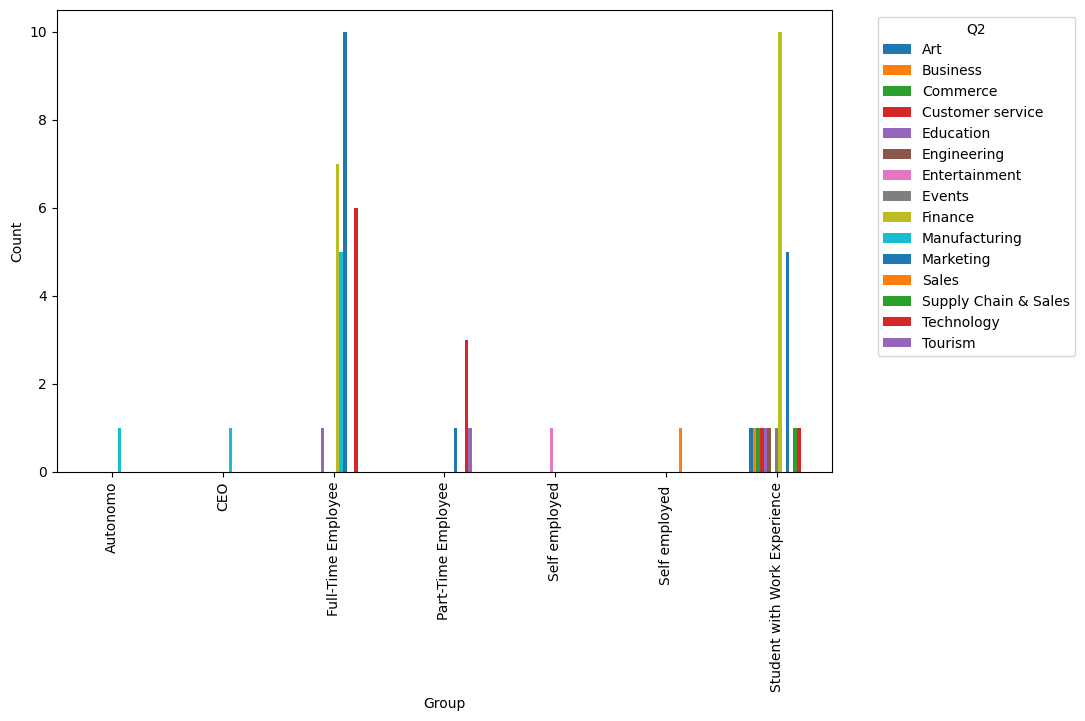

In [10]:
import matplotlib.pyplot as plt
# Group by 'Q1' and 'Q2'
grouped_counts = df_copy.groupby(['Q1', 'Q2']).size()
print(grouped_counts)

grouped_counts_unstacked = grouped_counts.unstack()
ax = grouped_counts_unstacked.plot(kind='bar', stacked=False, figsize=(10, 6))
ax.set_ylabel('Count')
ax.set_xlabel('Group')
plt.legend(title='Q2', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

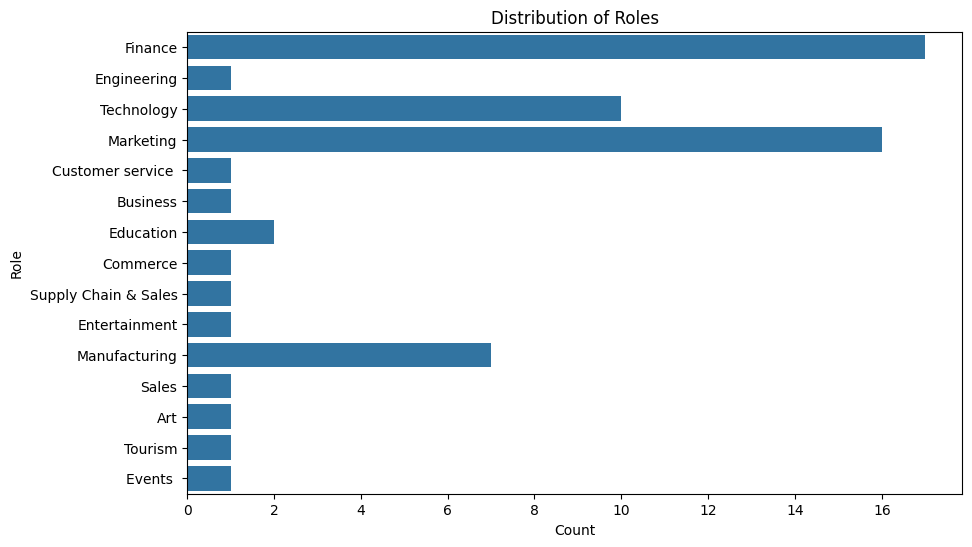

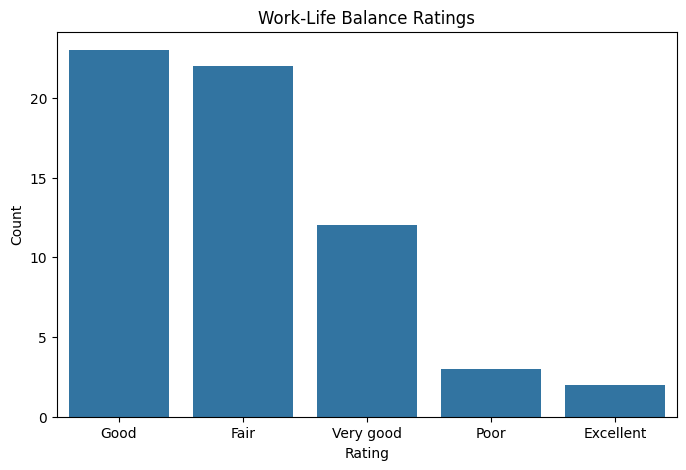

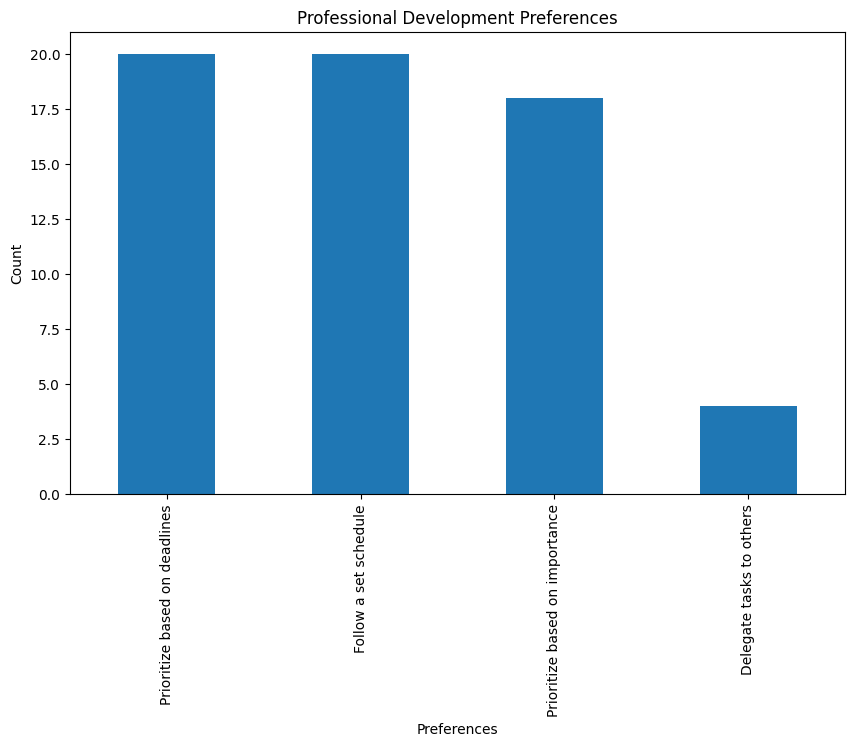

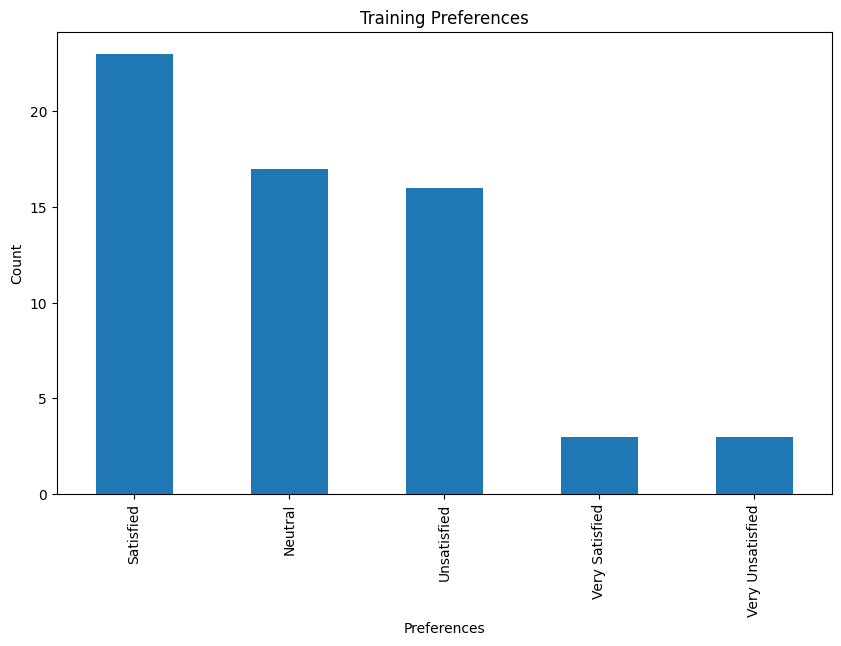

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explore distribution of roles
plt.figure(figsize=(10, 6))
sns.countplot(y='Q2', data=df_copy)
plt.title('Distribution of Roles')
plt.xlabel('Count')
plt.ylabel('Role')
plt.show()



# Examine work-life balance ratings
plt.figure(figsize=(8, 5))
sns.countplot(x='Q5', data=df_copy)
plt.title('Work-Life Balance Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Explore professional development preferences
plt.figure(figsize=(10, 6))
development_prefs = df_copy['Q10'].str.split(';').explode().str.strip().value_counts()
development_prefs.plot(kind='bar')
plt.title('Professional Development Preferences')
plt.xlabel('Preferences')
plt.ylabel('Count')
plt.show()
 
# Examine training preferences
plt.figure(figsize=(10, 6))
training_prefs = df_copy['Q9'].str.split(';').explode().str.strip().value_counts()
training_prefs.plot(kind='bar')
plt.title('Training Preferences')
plt.xlabel('Preferences')
plt.ylabel('Count')
plt.show()


/var/folders/dd/8bs90_x11fxby7j1952zh8m00000gn/T/ipykernel_93040/823704394.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=top_phrases, palette='viridis')


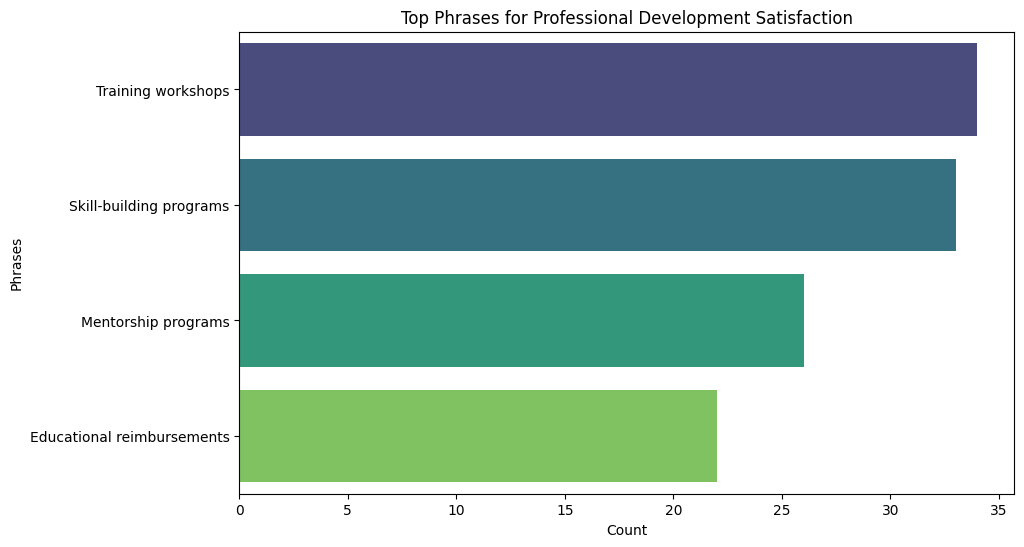

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Extract responses from Q11 and split them by ';'
q11_responses = df_copy['Q11'].str.split(';').explode().str.strip()

# Count occurrences of each phrase
phrase_counts = Counter(q11_responses)

# Extract the most common phrases and their counts
top_phrases = phrase_counts.most_common(5)  # Change 5 to the desired number of top phrases to display

# Convert the top phrases and counts into lists for plotting
top_phrases, counts = zip(*top_phrases)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=top_phrases, palette='viridis')
plt.title('Top Phrases for Professional Development Satisfaction')
plt.xlabel('Count')
plt.ylabel('Phrases')
plt.show()



In [13]:
df_copy.to_csv('/Users/danielnavia/Desktop/EmployeeClean.csv', index=False)

In [14]:
# Find the three most common phrases in column Q8
top_three_phrases = phrase_counts.nlargest(3)

print("The three most common phrases in column Q8 are:")
for phrase, count in top_three_phrases.items():
    print(f"{phrase}: {count} occurrences")

AttributeError: 'Counter' object has no attribute 'nlargest'

In [ ]:
# Find the three most common unique counts of responses in column Q4
top_three_responses = response_counts.nlargest(3)

print("The three most common unique counts of responses in column Q4 are:")
for response, count in top_three_responses.items():
    print(f"{response}: {count} occurrences")

The three most common unique counts of responses in column Q4 are:
Open office: 25 occurrences
Private office: 15 occurrences
Cubicles: 10 occurrences


In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each unique value in column Q9
q9_counts = df_copy['Q9'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(q9_counts, labels=q9_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of Q9')
plt.show()